In [116]:
# 1 - Importando Libs usadas para análise gráfica
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
# 2 - Lendo a base de dados.csv e criando um dataframe
dataframe = pd.read_csv("dados/base_dados.csv")

In [118]:
# 3 - Pré processamento dos dados

# Removendo dados nulos (transformando em 0)
if dataframe.isnull().sum().sum() > 0:
  dataframe.fillna(0)

# Transformando colunas categóricas em boleanas
dataframe = pd.get_dummies(dataframe, columns=['gênero', 'fumante', 'região'], drop_first=True)

# Exibindo as 10 primeiras entradas (para ver se aparentemente está tudo ok 😜)
dataframe.head(10)

,idade,imc,filhos,encargos,gênero_masculino,fumante_sim,região_noroeste,região_sudeste,região_sudoeste
0,56,25.201852,1,22315.46,False,False,False,True,False
1,46,28.505537,0,30741.95,False,True,True,False,False
2,32,27.919173,3,18578.11,True,False,False,True,False
3,60,40.465168,2,27074.13,False,False,True,False,False
4,25,28.749000,1,15113.89,True,False,False,False,False
5,38,21.979727,0,17472.30,True,False,False,False,False
6,56,26.522679,4,21992.18,False,False,False,False,True
7,36,18.118768,1,23081.09,False,True,False,False,True
8,40,26.597001,1,29903.14,False,True,False,True,False
9,28,22.834720,3,24266.83,True,True,False,False,True


In [119]:
# 4 - Função para gerar estatísticas gerais sobre o dataset
dataframe.describe()

,idade,imc,filhos,encargos
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,41.149000,26.839592,2.054333,24128.060520
std,13.474989,5.024725,1.426906,6032.169242
min,18.000000,11.116481,0.000000,10226.400000
25%,30.000000,23.495983,1.000000,19228.187500
50%,41.000000,26.844344,2.000000,23931.585000
75%,53.000000,30.193322,3.000000,29035.887500
max,64.000000,46.631189,4.000000,39984.650000


In [120]:
# 5 - Alterando o estilo dos gráficos para facilitar visualização
sns.set(style="darkgrid")

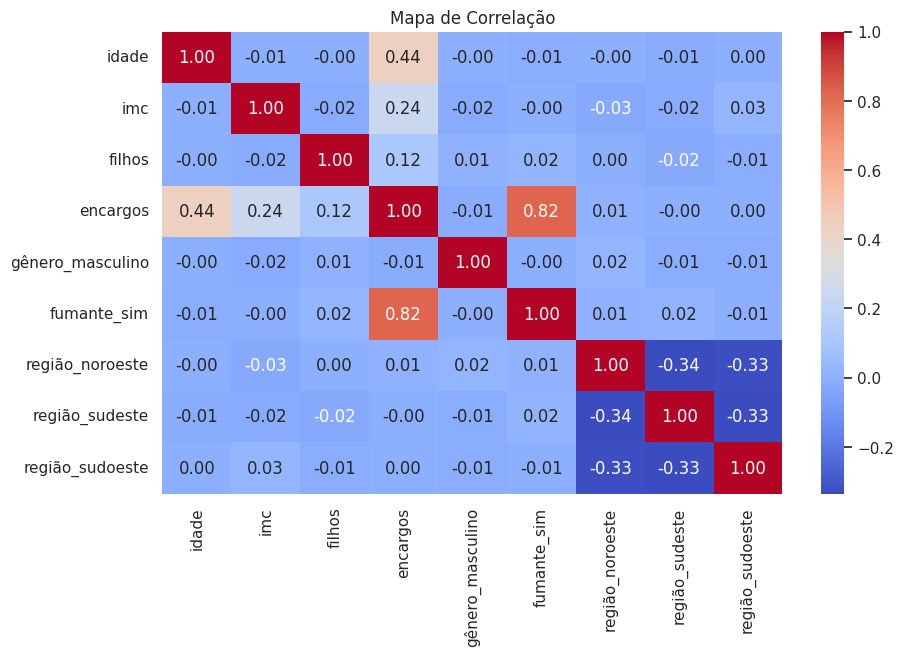

In [121]:
# 6 - Análises gráficas: insights sobre os dados

# Mapa de Correlação
plt.figure(figsize=(10, 6))
sns.heatmap(dataframe.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlação')
plt.show()

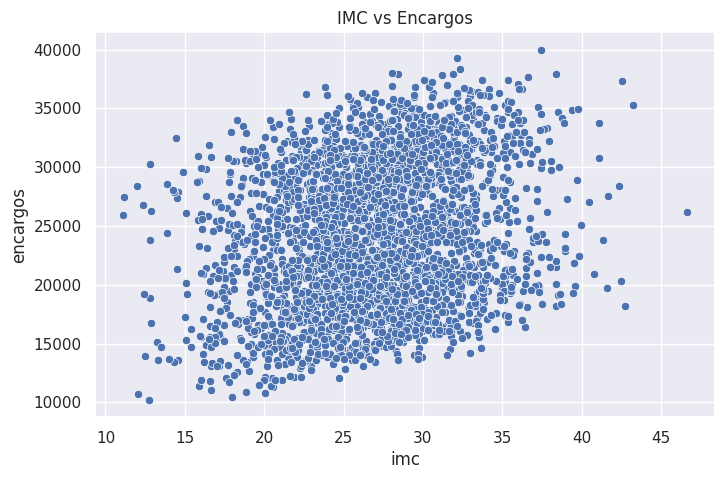

In [122]:
# Dispersão: IMC vs Encargos
plt.figure(figsize=(8, 5))
sns.scatterplot(data=dataframe, x='imc', y='encargos')
plt.title('IMC vs Encargos')
plt.show()

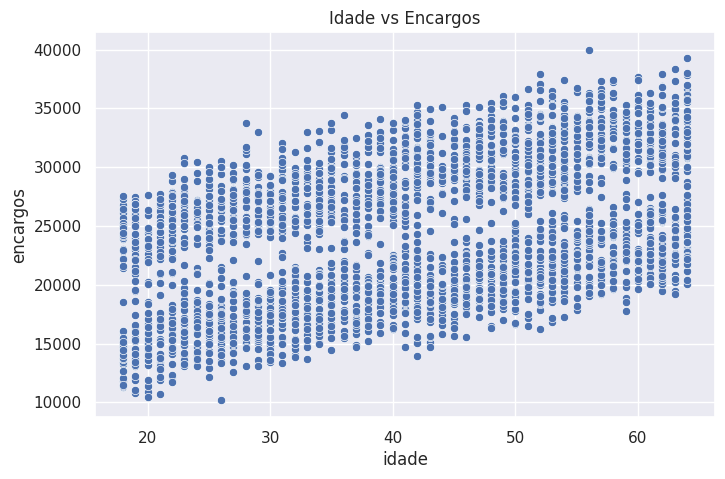

In [123]:
# Dispersão: Idade vs Encargos
plt.figure(figsize=(8, 5))
sns.scatterplot(data=dataframe, x='idade', y='encargos')
plt.title('Idade vs Encargos')
plt.show()

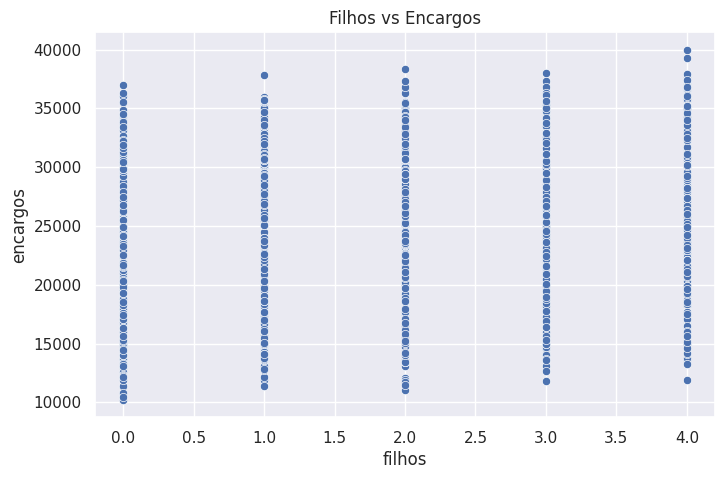

In [124]:
# Dispersão: Filhos vs Encargos
plt.figure(figsize=(8, 5))
sns.scatterplot(data=dataframe, x='filhos', y='encargos')
plt.title('Filhos vs Encargos')
plt.show()

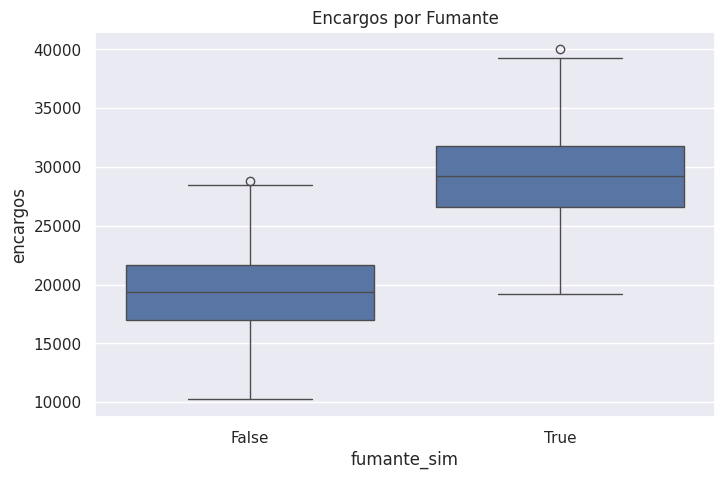

In [125]:
# Boxplot: Fumante vs Encargos
plt.figure(figsize=(8, 5))
sns.boxplot(x='fumante_sim', y='encargos', data=dataframe)
plt.title('Encargos por Fumante')
plt.show()

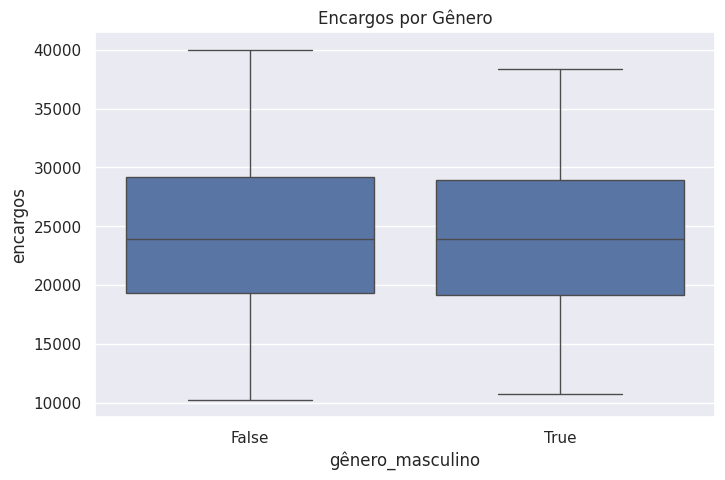

In [126]:
# Boxplot: Gênero vs Encargos
plt.figure(figsize=(8, 5))
sns.boxplot(x='gênero_masculino', y='encargos', data=dataframe)
plt.title('Encargos por Gênero')
plt.show()

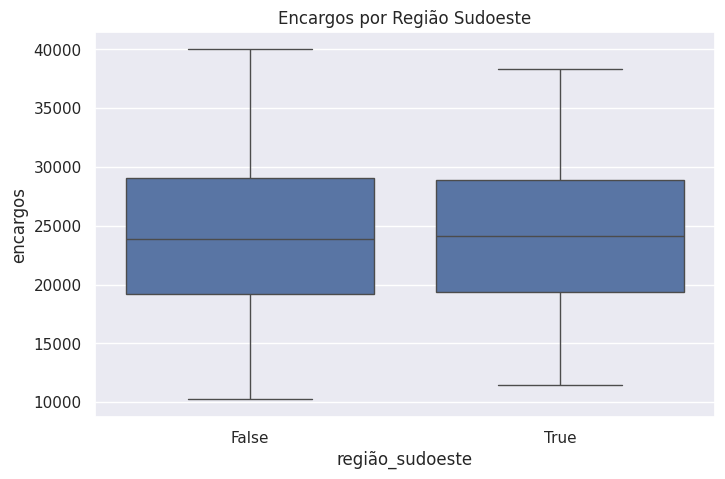

In [127]:
# Boxplot: Região Sudoeste vs Encargos
plt.figure(figsize=(8, 5))
sns.boxplot(x='região_sudoeste', y='encargos', data=dataframe)
plt.title('Encargos por Região Sudoeste')
plt.show()

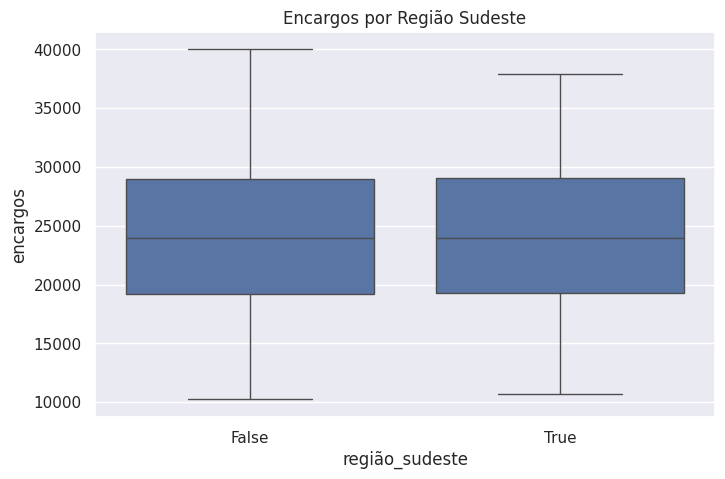

In [128]:
# Boxplot: Região Sudeste vs Encargos
plt.figure(figsize=(8, 5))
sns.boxplot(x='região_sudeste', y='encargos', data=dataframe)
plt.title('Encargos por Região Sudeste')
plt.show()

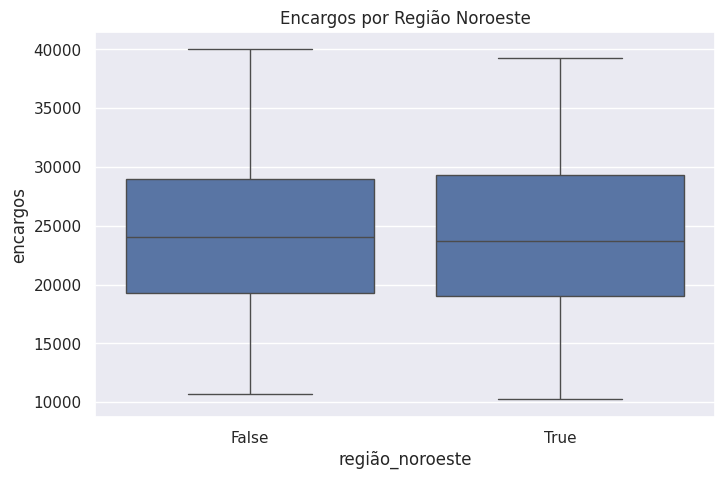

In [129]:
# Boxplot: Região Noroeste vs Encargos
plt.figure(figsize=(8, 5))
sns.boxplot(x='região_noroeste', y='encargos', data=dataframe)
plt.title('Encargos por Região Noroeste')
plt.show()

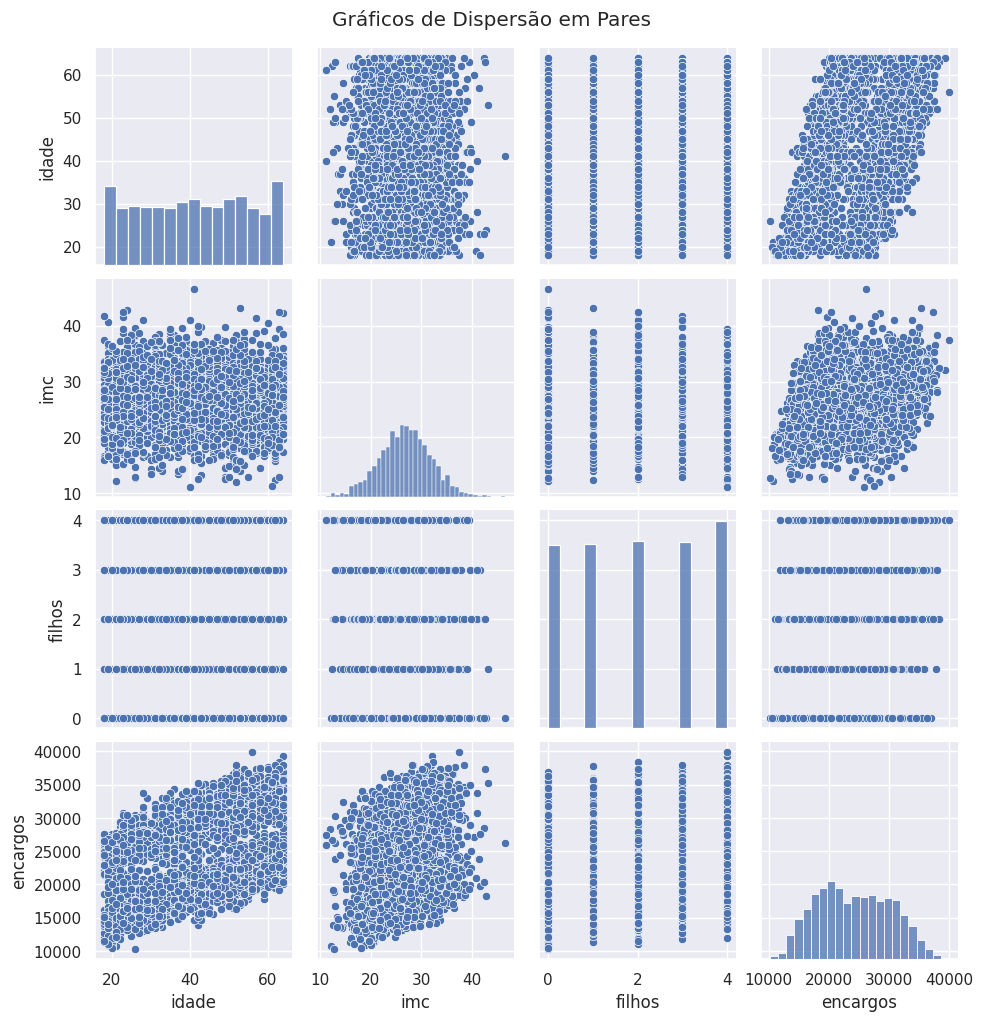

In [130]:
# Pairplot com variáveis principais
sns.pairplot(dataframe[['idade', 'imc', 'filhos', 'encargos']])
plt.suptitle('Gráficos de Dispersão em Pares', y=1.02)
plt.show()

In [131]:
# 7 - Libs usadas para criar o modelo preditivo

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [132]:
# 8 - Treinando o modelo

# Modelagem preditiva com Regressão Linear
X = dataframe.drop('encargos', axis=1)
y = dataframe['encargos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [133]:
# Avaliação
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 2180552.927098733
MAE: 1240.0834440341118
R²: 0.939080444032257


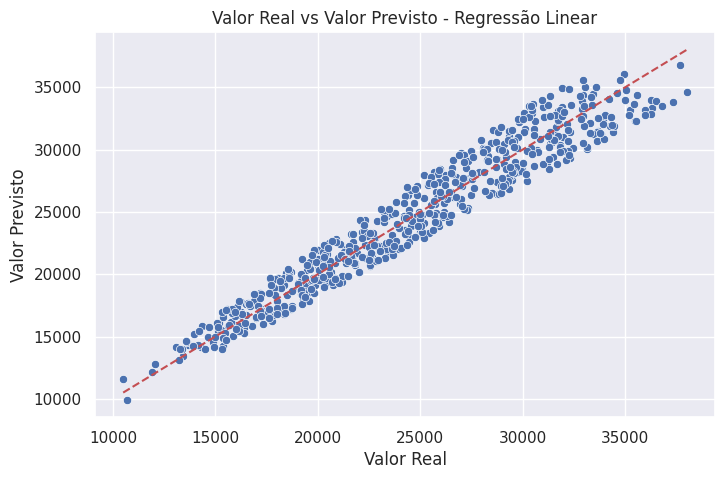

In [134]:
# Gráfico: Preço Real vs Previsto
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valor Real")
plt.ylabel("Valor Previsto")
plt.title("Valor Real vs Valor Previsto - Regressão Linear")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [135]:
# 9 - Libs de validação estatística

import statsmodels.api as sm

In [136]:
# 12. Validação estatística com statsmodels

# Convertendo colunas boleanas para integers
dataframe_numeric = dataframe.astype(int, errors='ignore')
X = dataframe_numeric.drop('encargos', axis=1)
y = dataframe_numeric['encargos']

X_const = sm.add_constant(X)
modelo_ols = sm.OLS(y, X_const).fit()

print(modelo_ols.summary())

                            OLS Regression Results                            
Dep. Variable:               encargos   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     6107.
Date:                Wed, 04 Jun 2025   Prob (F-statistic):               0.00
Time:                        02:23:11   Log-Likelihood:                -26092.
No. Observations:                3000   AIC:                         5.220e+04
Df Residuals:                    2991   BIC:                         5.226e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2427.9315    180.188  